This is an analysis of the TP53 screen, including presence and activity-based selection methods using ABE8e (RDA867) and TadCBEd (RDB270). This data DOES NOT include read counts from self-edited guides. We restrict this data to NGN PAMs for this analysis.

In [1]:
#importing packages
import pandas as pd
from poola import core as pool
import seaborn as sns
import gpplot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import gpplot as gpp
from itertools import product
import matplotlib.patches as patches

gpp.set_aesthetics()

# ABE presence-based selection

In [2]:
annotation = pd.read_csv("../../required_data/TP53/TP53_tiling_NNNN_BE_annotations_5col.csv")

In [3]:
#reading in metainfo
meta_info = pd.read_csv('../../required_data/TP53/TP53_tiling_NNNN.txt', delimiter = "\t")
#NGN PAMs only
meta_info = meta_info[meta_info['PAM Sequence'].str[1]=='G']

#dropping extraneous columns and C>T annotations
meta_info.drop(meta_info[meta_info['Edit Type'] == 'C-T'].index, inplace=True)

#dropping guides that were not included in final library
meta_info_merged = pd.merge(meta_info, annotation, on='sgRNA Target Sequence')

In [4]:
annotation_controls = annotation[annotation['Target Gene ID']!='ENSG00000141510']
annotation = pd.merge(meta_info_merged['sgRNA Target Sequence'], annotation, on='sgRNA Target Sequence', how='inner')
annotation = pd.concat([annotation, annotation_controls], sort=False)

In [5]:
#import read counts file from POOLQ withOUT self-editing added
read_counts = pd.read_csv('../../required_data/TP53/counts_TP53_presence.txt', sep='\t')

In [6]:
#adding in annotations
annot_read_counts = annotation.merge(read_counts, left_on= 'sgRNA Target Sequence', right_on='Construct Barcode', how='inner')

In [7]:
#abbreviating column names
annot_read_counts.rename(columns = {
       'A549_RDA867CP1845DropoutA21':"DO_RepA_D21",
       'A549_RDA867CP1845DropoutB21':"DO_RepB_D21",
       'A549_RDA867CP1845EtoposideA21':"Eto_RepA_D21",
       'A549_RDA867CP1845EtoposideB21':"Eto_RepB_D21",
       }, inplace= True)

In [8]:
#calculating lognorms
lognorms = pool.lognorm_columns(reads_df=annot_read_counts, columns=['CP1845', 
                                                                'DO_RepA_D21', 'DO_RepB_D21','Eto_RepA_D21','Eto_RepB_D21'
                                                               ])

filtered_lognorms = pool.filter_pdna(lognorm_df=lognorms, pdna_cols=['CP1845'], z_low=-3)
print('Filtered ' + str(lognorms.shape[0] - filtered_lognorms.shape[0]) + ' columns due to low pDNA abundance')

Filtered 3 columns due to low pDNA abundance


In [9]:
#calculating lfcs from pDNA
lfc = pool.calculate_lfcs(lognorm_df=filtered_lognorms, ref_col='CP1845', 
                             target_cols=['DO_RepA_D21', 'DO_RepB_D21'])

lfc['DO_RepAB_D21'] = lfc[["DO_RepA_D21","DO_RepB_D21"]].mean(axis=1)

In [10]:
#calculating lfcs from Drop out
lfc_from_drop_out = pool.calculate_lfcs(filtered_lognorms, ref_map = {'Eto_RepA_D21': 'DO_RepA_D21', 'Eto_RepB_D21': 'DO_RepB_D21'})
lfc_from_drop_out['Eto_RepAB_D21'] = lfc_from_drop_out[["Eto_RepA_D21","Eto_RepB_D21"]].mean(axis=1)

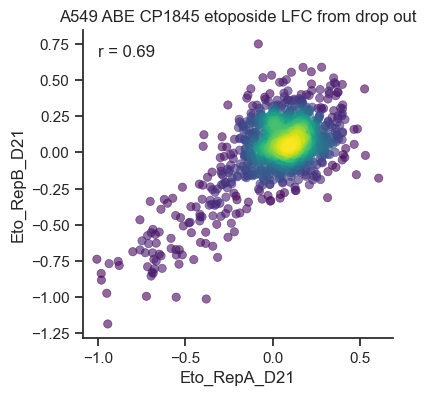

In [11]:
#### plotting dropout replicate correlations (lfc from drop out)
plt.subplots(figsize=(4,4))
gpplot.point_densityplot(data=lfc_from_drop_out, x='Eto_RepA_D21', y='Eto_RepB_D21')
gpplot.add_correlation(data=lfc_from_drop_out, x='Eto_RepA_D21', y='Eto_RepB_D21')
plt.title('A549 ABE CP1845 etoposide LFC from drop out')
sns.despine()

# ABE activity-based selection

In [12]:
annotation = pd.read_csv("../../required_data/TP53/TP53_tiling_NNNN_BE_annotations_5col.csv")

In [13]:
#reading in metainfo
meta_info = pd.read_csv('../../required_data/TP53/TP53_tiling_NNNN.txt', delimiter = "\t")
meta_info = meta_info[meta_info['PAM Sequence'].str[1]=='G']

#dropping extraneous columns and C>T annotations
meta_info.drop(meta_info[meta_info['Edit Type'] == 'C-T'].index, inplace=True)

#dropping guides that were not included in final library
meta_info_merged = pd.merge(meta_info, annotation, on='sgRNA Target Sequence')

In [14]:
annotation_controls = annotation[annotation['Target Gene ID']!='ENSG00000141510']
annotation = pd.merge(meta_info_merged['sgRNA Target Sequence'], annotation, on='sgRNA Target Sequence', how='inner')
annotation = pd.concat([annotation, annotation_controls], sort=False)

In [15]:
#import read counts file from POOLQ without self-editing added
read_counts = pd.read_csv('../../required_data/TP53/counts_TP53_activity.txt', sep='\t')

In [16]:
#adding in annotations
annot_read_counts = annotation.merge(read_counts, left_on= 'sgRNA Target Sequence', right_on = 'Construct Barcode')

In [17]:
#abbreviating column names
annot_read_counts.rename(columns = {
       'A549_RDA867CP2087DropoutA21':"DO_RepA_D21",
       'A549_RDA867CP2088DropoutA21':"DO_RepB_D21",
       'A549_RDA867CP2087EtoposideA21':"Eto_RepA_D21",
       'A549_RDA867CP2088EtoposideA21':"Eto_RepB_D21",
       }, inplace= True)

In [18]:
#calculating lognorms
lognorms = pool.lognorm_columns(reads_df=annot_read_counts, columns=['CP2087', 'CP2088',
                                                                'DO_RepA_D21', 'DO_RepB_D21','Eto_RepA_D21','Eto_RepB_D21'
                                                               ])

filtered_lognorms = pool.filter_pdna(lognorm_df=lognorms, pdna_cols=['CP2087'], z_low=-3)
filtered_lognorms = pool.filter_pdna(lognorm_df=lognorms, pdna_cols=['CP2088'], z_low=-3)
print('Filtered ' + str(lognorms.shape[0] - filtered_lognorms.shape[0]) + ' columns due to low pDNA abundance')

Filtered 3 columns due to low pDNA abundance


In [19]:
#calculating lfcs from pDNA
lfc = pool.calculate_lfcs(lognorm_df=filtered_lognorms, ref_map = {'DO_RepA_D21': 'CP2087', 'DO_RepB_D21': 'CP2088'})

In [20]:
lfc['DO_RepAB_D21'] = lfc[["DO_RepA_D21","DO_RepB_D21"]].mean(axis=1)
lfc[lfc['Gene Symbol Bin']=='ONE_NON-GENE_SITE']['DO_RepAB_D21'].mean()

np.float64(-0.36275846785625443)

In [21]:
#calculating lfcs from Drop out
lfc_from_drop_out = pool.calculate_lfcs(filtered_lognorms, ref_map = {'Eto_RepA_D21': 'DO_RepA_D21', 'Eto_RepB_D21': 'DO_RepB_D21'})
lfc_from_drop_out['Eto_RepAB_D21'] = lfc_from_drop_out[["Eto_RepA_D21","Eto_RepB_D21"]].mean(axis=1)

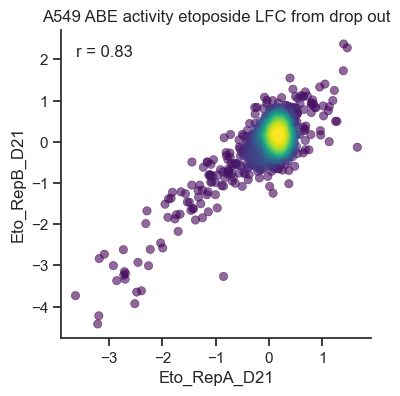

In [22]:
plt.subplots(figsize=(4,4))
gpplot.point_densityplot(data=lfc_from_drop_out, x='Eto_RepA_D21', y='Eto_RepB_D21')
gpplot.add_correlation(data=lfc_from_drop_out, x='Eto_RepA_D21', y='Eto_RepB_D21')
plt.title('A549 ABE activity etoposide LFC from drop out')
sns.despine()

# CBE presence-based selection

In [23]:
annotation = pd.read_csv("../../required_data/TP53/TP53_tiling_NNNN_BE_annotations_5col.csv")

#reading in metainfo
meta_info = pd.read_csv('../../required_data/TP53/TP53_tiling_NNNN.txt', delimiter = "\t")
meta_info = meta_info[meta_info['PAM Sequence'].str[1]=='G']

#dropping extraneous columns and C>T annotations
meta_info.drop(meta_info[meta_info['Edit Type'] == 'A-G'].index, inplace=True)

#dropping guides that were not included in final library
meta_info_merged = pd.merge(meta_info, annotation, on='sgRNA Target Sequence')

#import read counts file from POOLQ without self-editing added
read_counts = pd.read_csv('../../required_data/TP53/counts_TP53_presence.txt', sep='\t')

In [24]:
annotation_controls = annotation[annotation['Target Gene ID']!='ENSG00000141510']
annotation = pd.merge(meta_info_merged['sgRNA Target Sequence'], annotation, on='sgRNA Target Sequence', how='inner')
annotation = pd.concat([annotation, annotation_controls], sort=False)

In [25]:
#adding in annotations
annot_read_counts = annotation.merge(read_counts, left_on= 'sgRNA Target Sequence', right_on = 'Construct Barcode')

#abbreviating column names
annot_read_counts.rename(columns = {
       'A549_RDB270CP1845DropoutA21':"DO_RepA_D21",
       'A549_RDB270CP1845DropoutB21':"DO_RepB_D21",
       'A549_RDB270CP1845EtoposideA21':"Eto_RepA_D21",
       'A549_RDB270CP1845EtoposideB21':"Eto_RepB_D21",
       }, inplace= True)

In [26]:
#calculating lognorms
lognorms = pool.lognorm_columns(reads_df=annot_read_counts, columns=['CP1845', 
                                                                'DO_RepA_D21', 'DO_RepB_D21','Eto_RepA_D21','Eto_RepB_D21'
                                                               ])

filtered_lognorms = pool.filter_pdna(lognorm_df=lognorms, pdna_cols=['CP1845'], z_low=-3)
print('Filtered ' + str(lognorms.shape[0] - filtered_lognorms.shape[0]) + ' columns due to low pDNA abundance')

Filtered 3 columns due to low pDNA abundance


In [27]:
#calculating lfcs from pDNA
lfc = pool.calculate_lfcs(lognorm_df=filtered_lognorms, ref_col='CP1845', 
                             target_cols=['DO_RepA_D21', 'DO_RepB_D21'])

lfc['DO_RepAB_D21'] = lfc[["DO_RepA_D21","DO_RepB_D21"]].mean(axis=1)

In [28]:
#calculating lfcs from Drop out
lfc_from_drop_out = pool.calculate_lfcs(filtered_lognorms, ref_map = {'Eto_RepA_D21': 'DO_RepA_D21', 'Eto_RepB_D21': 'DO_RepB_D21'})
lfc_from_drop_out['Eto_RepAB_D21'] = lfc_from_drop_out[["Eto_RepA_D21","Eto_RepB_D21"]].mean(axis=1)

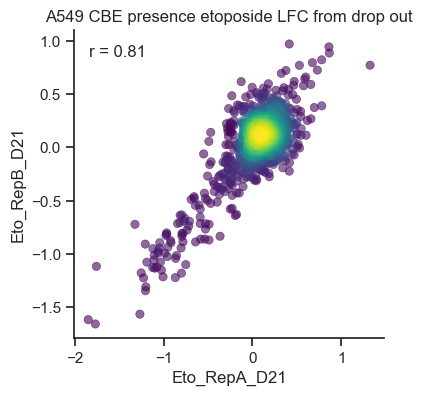

In [29]:
plt.subplots(figsize=(4,4))
gpplot.point_densityplot(data=lfc_from_drop_out, x='Eto_RepA_D21', y='Eto_RepB_D21')
gpplot.add_correlation(data=lfc_from_drop_out, x='Eto_RepA_D21', y='Eto_RepB_D21')
plt.title('A549 CBE presence etoposide LFC from drop out')
sns.despine()

# CBE activity-based selection

In [30]:
annotation = pd.read_csv("../../required_data/TP53/TP53_tiling_NNNN_BE_annotations_5col.csv")

#reading in metainfo
meta_info = pd.read_csv('../../required_data/TP53/TP53_tiling_NNNN.txt', delimiter = "\t")
meta_info = meta_info[meta_info['PAM Sequence'].str[1]=='G']

#dropping extraneous columns and C>T annotations
meta_info.drop(meta_info[meta_info['Edit Type'] == 'A-G'].index, inplace=True)

#dropping guides that were not included in final library
meta_info_merged = pd.merge(meta_info, annotation, on='sgRNA Target Sequence')

#import read counts file from POOLQ without self-editing added
read_counts = pd.read_csv('../../required_data/TP53/counts_TP53_activity.txt', sep='\t')

In [31]:
annotation_controls = annotation[annotation['Target Gene ID']!='ENSG00000141510']
annotation = pd.merge(meta_info_merged['sgRNA Target Sequence'], annotation, on='sgRNA Target Sequence', how='inner')
annotation = pd.concat([annotation, annotation_controls], sort=False)

In [32]:
#adding in annotations
annot_read_counts = annotation.merge(read_counts, left_on= 'sgRNA Target Sequence', right_on = 'Construct Barcode')

#abbreviating column names
annot_read_counts.rename(columns = {
       'A549_RDB270CP2089DropoutA21':"DO_RepA_D21",
       'A549_RDB270CP2090DropoutA21':"DO_RepB_D21",
       'A549_RDB270CP2089EtoposideA21':"Eto_RepA_D21",
       'A549_RDB270CP2090EtoposideA21':"Eto_RepB_D21",
       }, inplace= True)

In [33]:
#calculating lognorms
lognorms = pool.lognorm_columns(reads_df=annot_read_counts, columns=['CP2089', 'CP2090',
                                                                'DO_RepA_D21', 'DO_RepB_D21','Eto_RepA_D21','Eto_RepB_D21'
                                                               ])

filtered_lognorms = pool.filter_pdna(lognorm_df=lognorms, pdna_cols=['CP2089'], z_low=-3)
filtered_lognorms = pool.filter_pdna(lognorm_df=lognorms, pdna_cols=['CP2090'], z_low=-3)
print('Filtered ' + str(lognorms.shape[0] - filtered_lognorms.shape[0]) + ' columns due to low pDNA abundance')

Filtered 5 columns due to low pDNA abundance


In [34]:
#calculating lfcs from pDNA
lfc = pool.calculate_lfcs(lognorm_df=filtered_lognorms, ref_map = {'DO_RepA_D21': 'CP2089', 'DO_RepB_D21': 'CP2090'})

In [35]:
lfc['DO_RepAB_D21'] = lfc[["DO_RepA_D21","DO_RepB_D21"]].mean(axis=1)
lfc[lfc['Gene Symbol Bin']=='ONE_NON-GENE_SITE']['DO_RepAB_D21'].mean()

np.float64(-0.2502470433770821)

In [36]:
#calculating lfcs from Drop out
lfc_from_drop_out = pool.calculate_lfcs(filtered_lognorms, ref_map = {'Eto_RepA_D21': 'DO_RepA_D21', 'Eto_RepB_D21': 'DO_RepB_D21'})
lfc_from_drop_out['Eto_RepAB_D21'] = lfc_from_drop_out[["Eto_RepA_D21","Eto_RepB_D21"]].mean(axis=1)

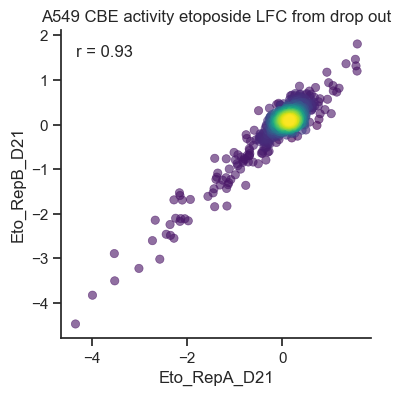

In [37]:
plt.subplots(figsize=(4,4))
gpplot.point_densityplot(data=lfc_from_drop_out, x='Eto_RepA_D21', y='Eto_RepB_D21')
gpplot.add_correlation(data=lfc_from_drop_out, x='Eto_RepA_D21', y='Eto_RepB_D21')
plt.title('A549 CBE activity etoposide LFC from drop out')
sns.despine()